# Capstone Project 2 -- Data Wrangling
### This project will look at data from UCI Irvine and data on wine quality based on various chemical parameters

First import all needed packages. Then load the wine wine table, add a column that indicates it's white wine.  Then union the red wine table with an indicator that it's red wine

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file

## Load the red wine data first

In [9]:
# The CSV uses a custom delimiter, ';'
redWine = pd.read_csv('../data/winequality-red.csv', delimiter =";")

In [10]:
# Call the info method
redWine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [11]:
# Because this is red wine, will add a column wine_color, and make it 1 for red, 2 for white
redWine['wine_color'] = 1

In [12]:
# Make sure this new column is added
redWine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

We can see all columns are expressed numerically.  wine_color, the column that was added is actually a categorical variable.  Similarly, the quality column could be considered a categorical variable, however the quality indicator is ordinal data in which rank makes sense.

In [13]:
print(redWine.describe().T)

                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   
wine_color            1599.0   1.000000   0.000000  1.00000   1.

Let's see if there are NaN values

In [14]:
print(redWine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_color              0
dtype: int64


The red wine dataset is very complete.

Let's look at the histograms of this data

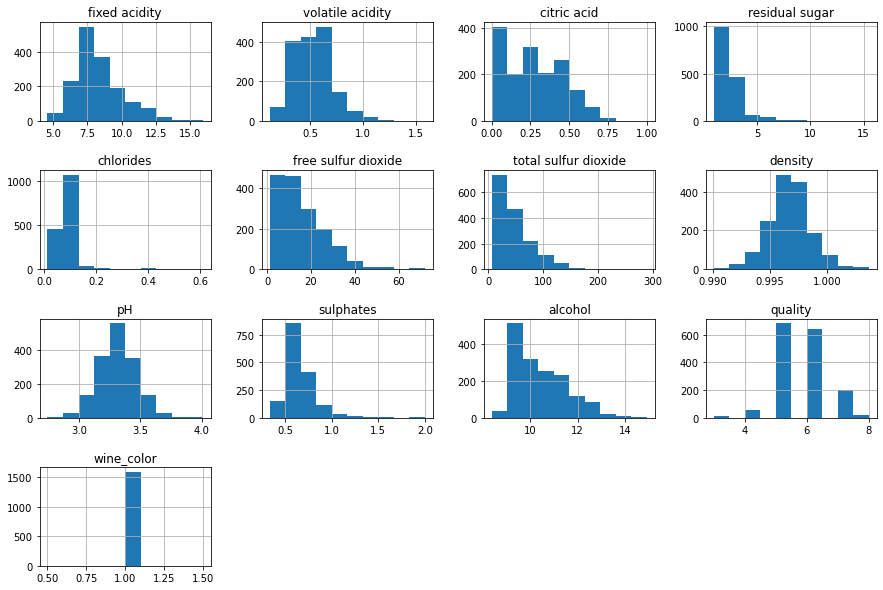

In [15]:
redWine.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

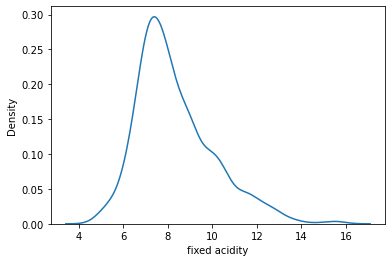

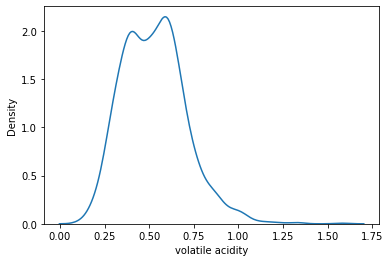

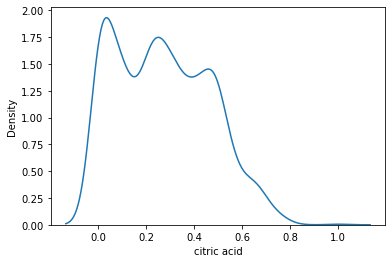

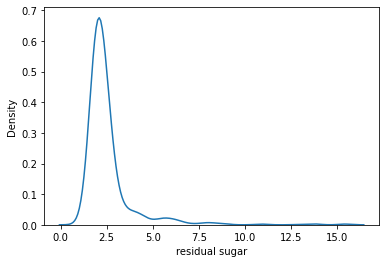

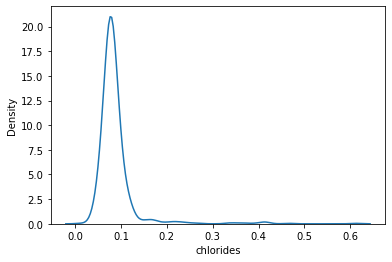

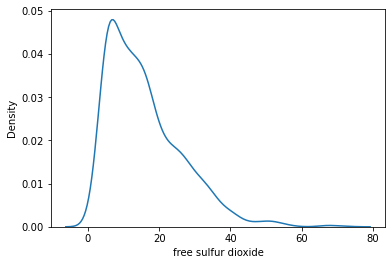

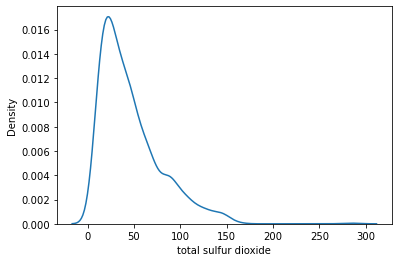

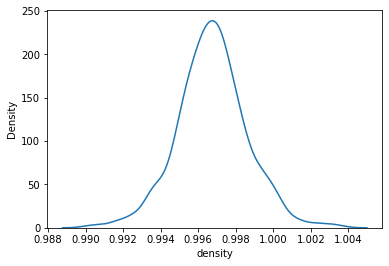

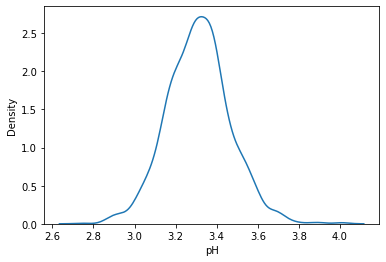

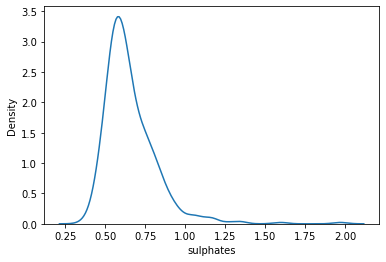

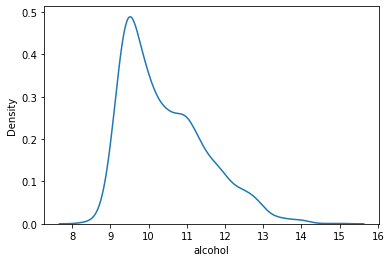

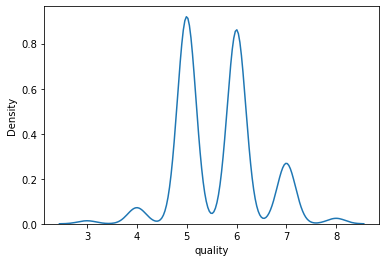

In [16]:
col_list = list(redWine.columns)
col_list.remove('wine_color')

for col in col_list:
    sns.kdeplot(redWine[col])
    plt.show()

Not all data look particularly normal.  Recall, quality is categorical and with descrete values.

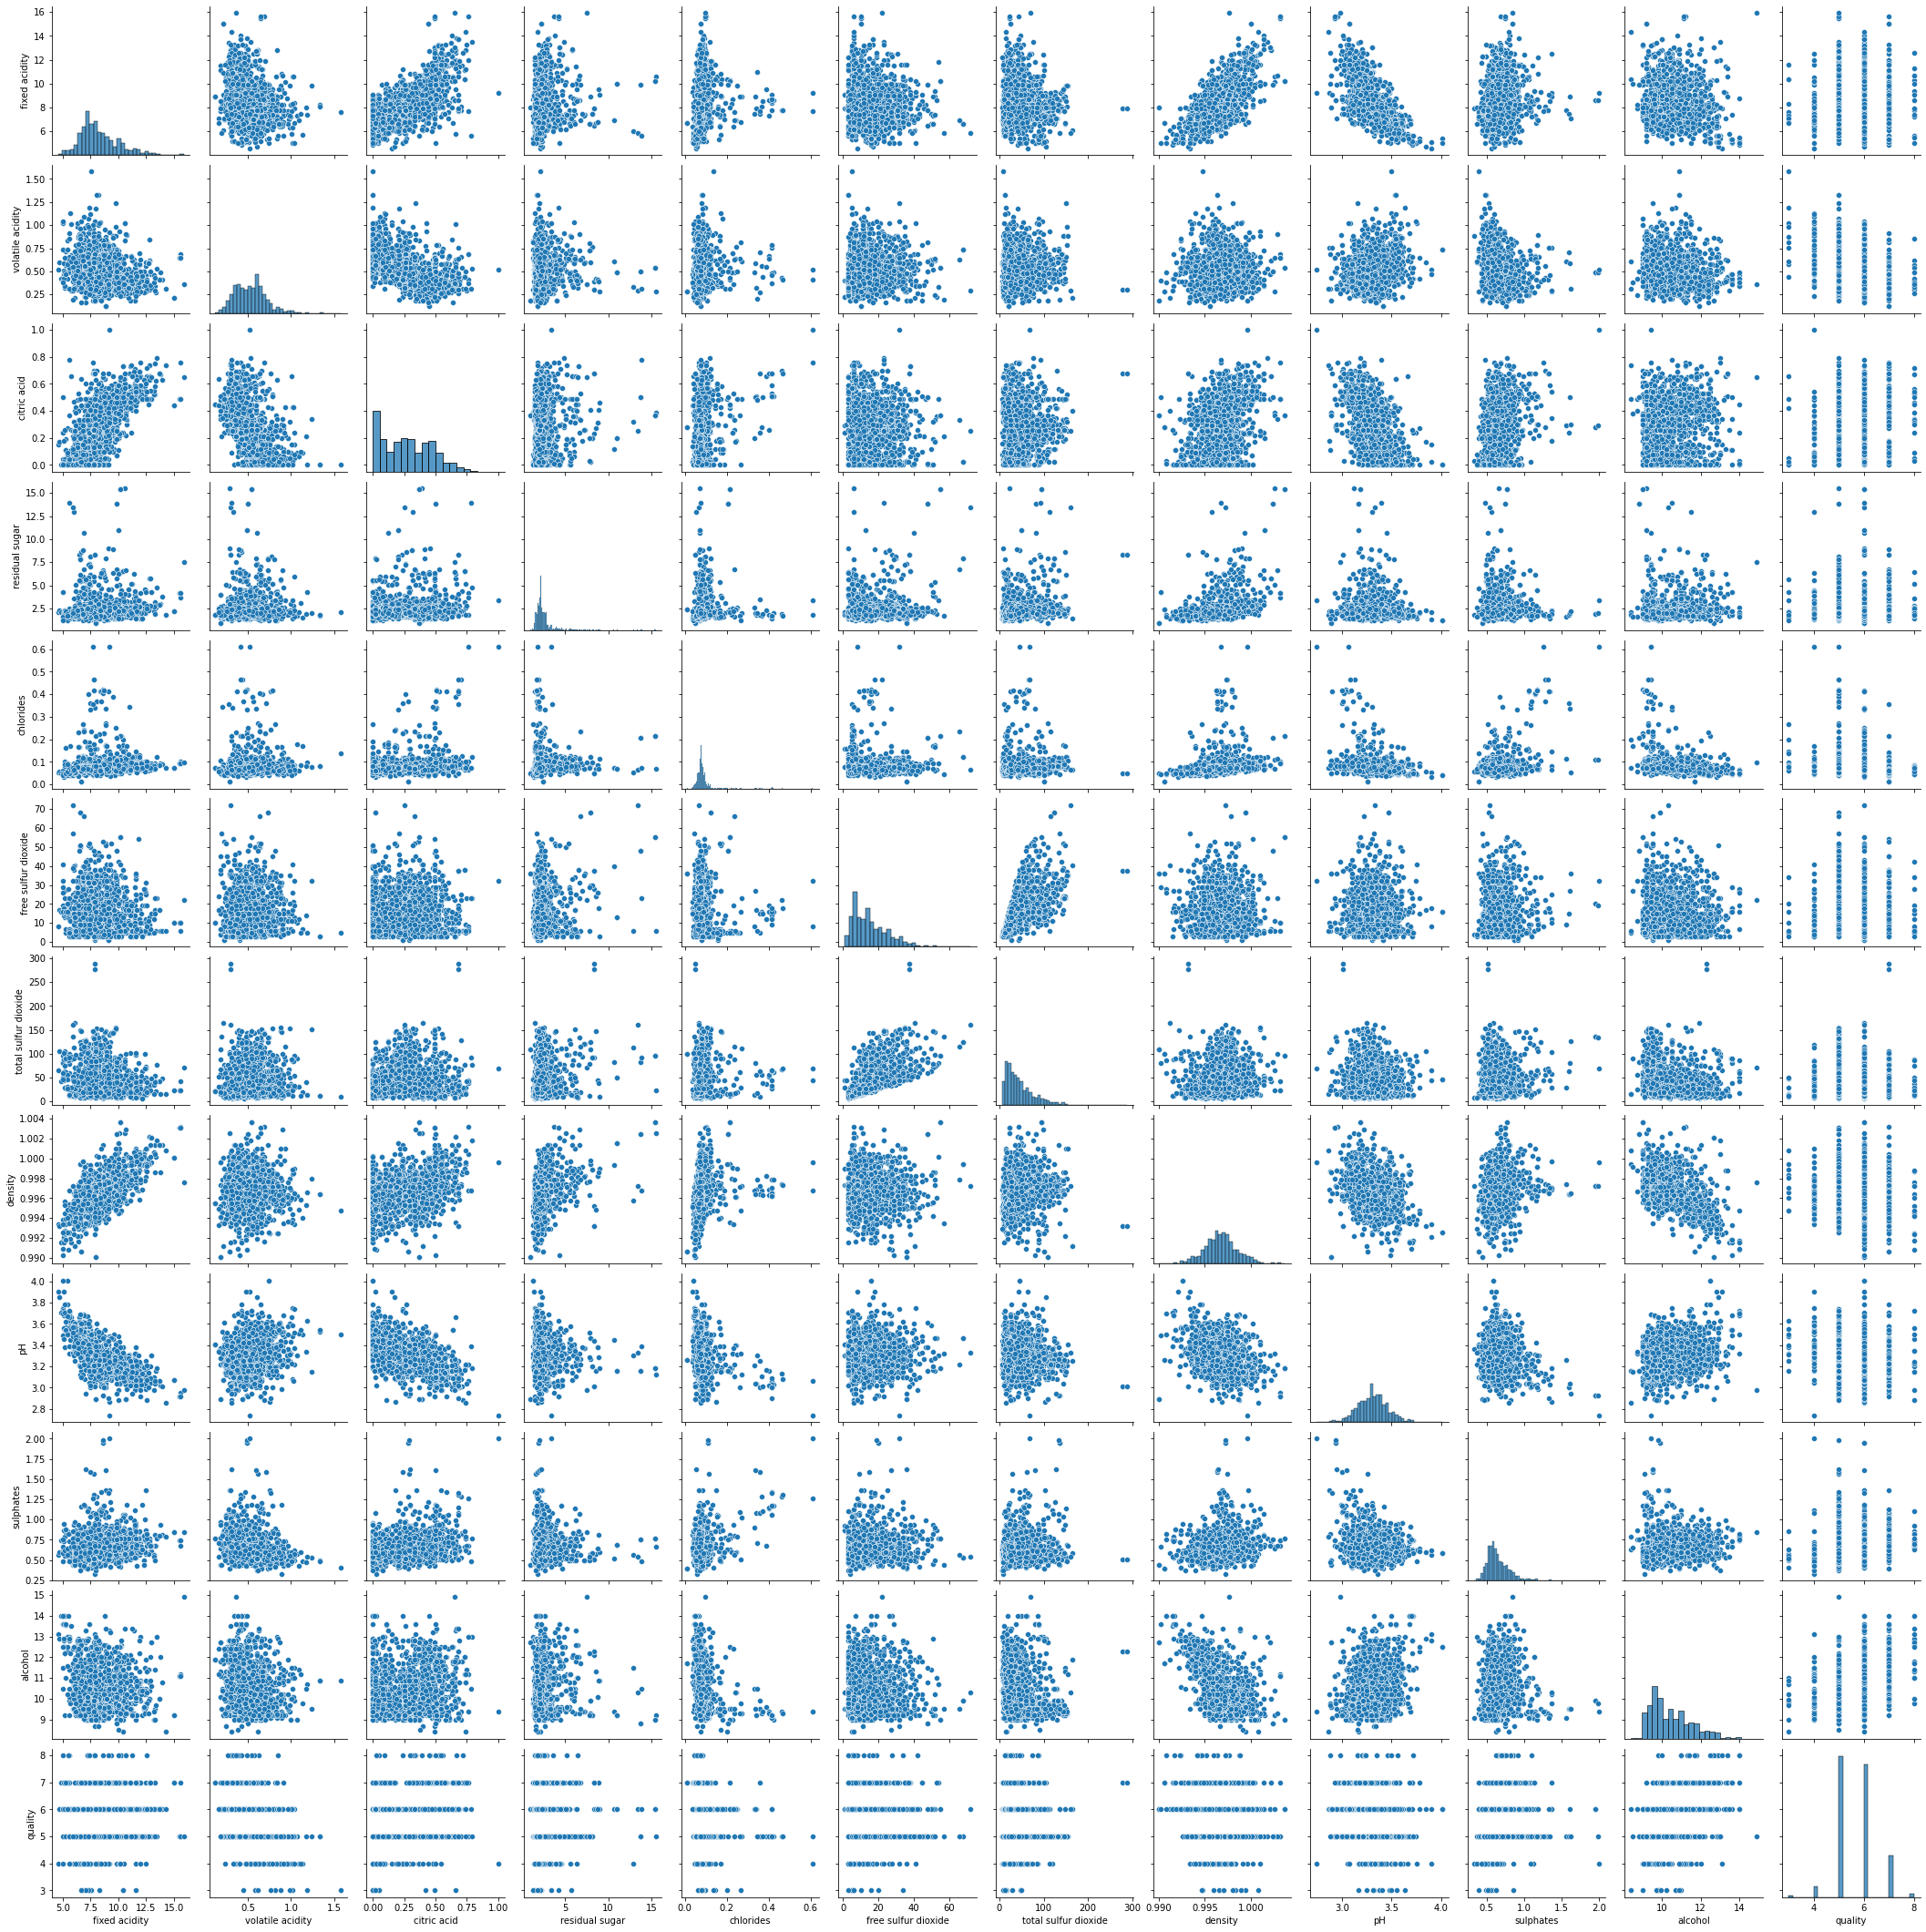

In [17]:
sns.pairplot(data = redWine[col_list])

Now, let's look at the white wine data

In [18]:
whiteWine = pd.read_csv('../data/winequality-white.csv', delimiter =";")

In [19]:
whiteWine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020

In [20]:
# Because this is white wine, will add a column wine_color, and make it 1 for red, 2 for white
whiteWine['wine_color'] = 2

In [21]:
# Make sure this new column is added
whiteWine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020

In [22]:
print(whiteWine.describe().T)

                       count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   
wine_color  

Let's check to see if there are any missing values with which we'll need to contend.

In [23]:
print(whiteWine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_color              0
dtype: int64


The white wine dataset is very complete.
Let's look at the histograms of this data

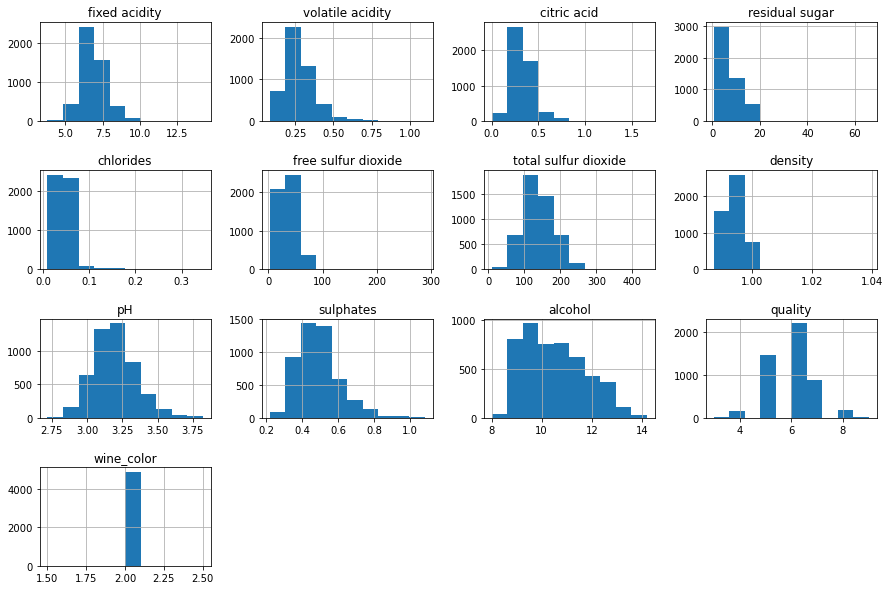

In [24]:
whiteWine.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Let's look at the distributional shape of the data

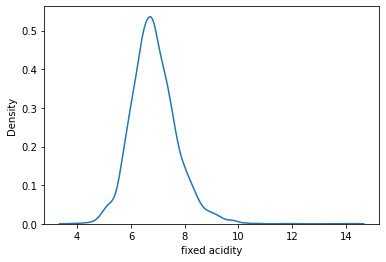

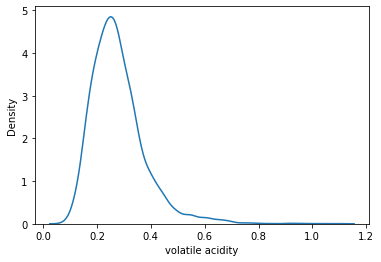

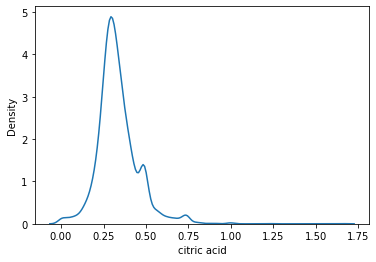

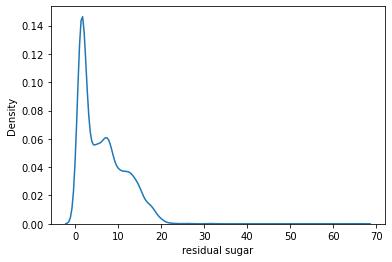

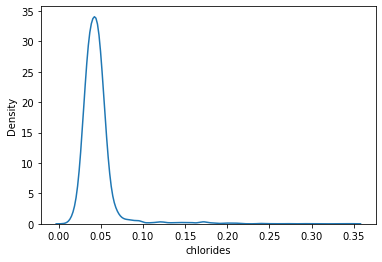

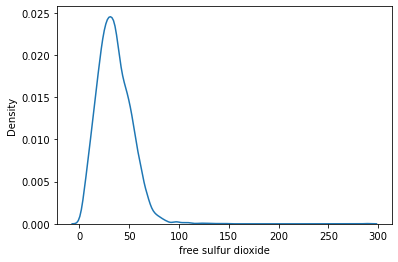

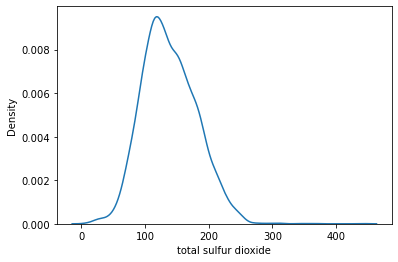

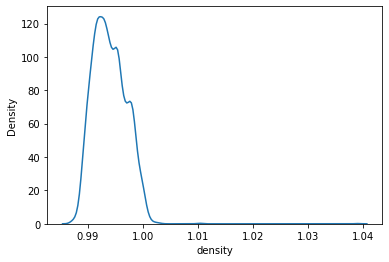

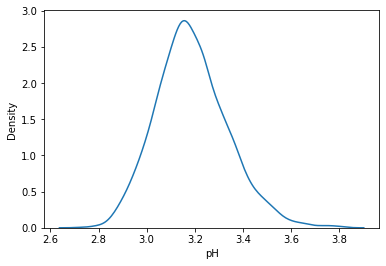

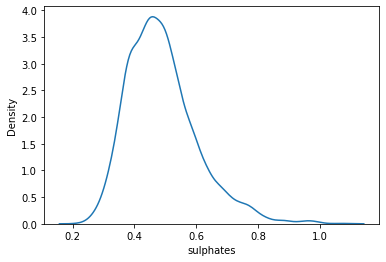

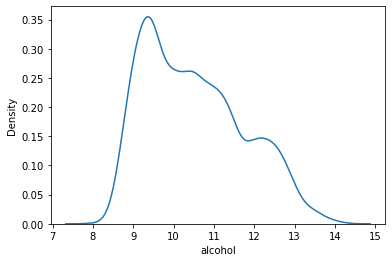

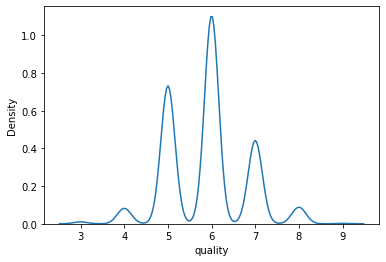

In [25]:
#fig, ax = plt.subplots(2, 2, figsize=(12, 12)

#sns.kdeplot(…., ax=ax[0,0])
#sns.kdeplot(…., ax=[0,1])


col_list = list(whiteWine.columns)
col_list.remove('wine_color')

for col in col_list:
    sns.kdeplot(whiteWine[col])
    plt.show()

some none normality -- recall, quality is categorical. However, there are other continuous variables that are not particularly normal.  For modeling purposes, we'll need to use a probit model to model quality.

Let's do some pair plots to get a sense of the relationships.

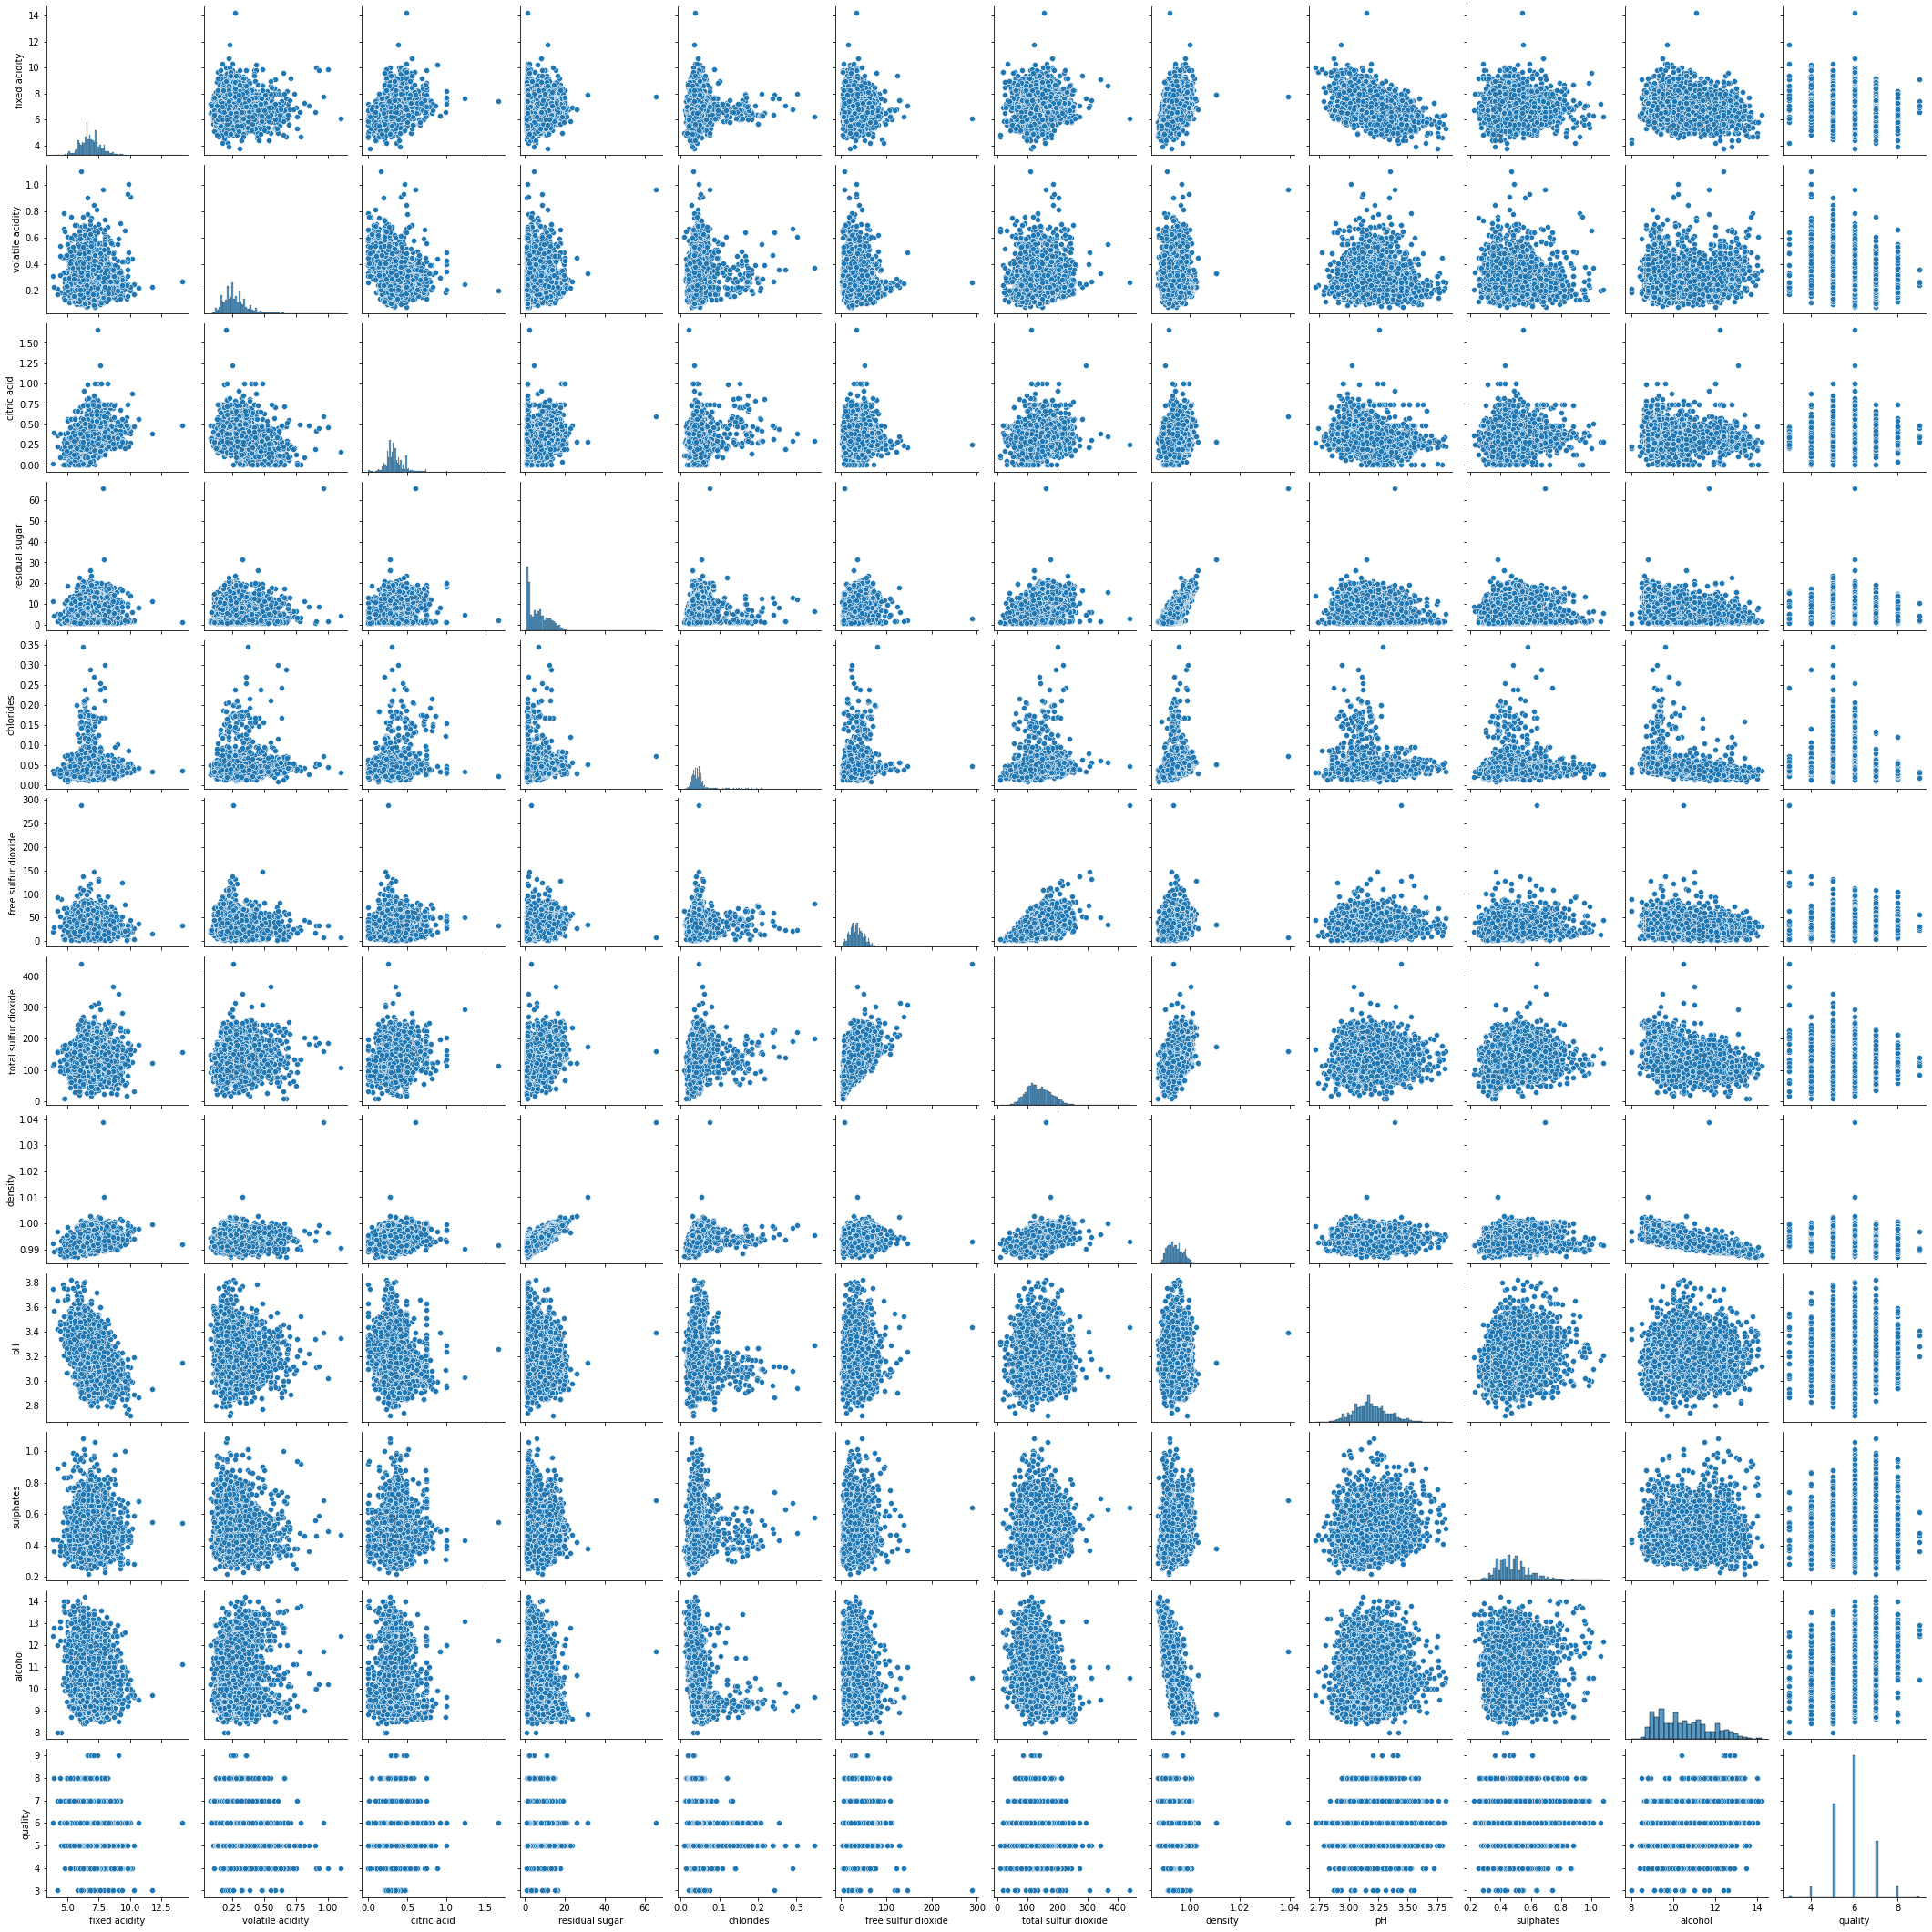

In [26]:
sns.pairplot(data = whiteWine[col_list])

Finally, let's union the two tables into a single table.  Recall, the red wine table is 1599 rows x 13 columns and the white wine table is 4898 rows x 13 columns.  The final table should be 6497 rows x 13 columns.  Let's look at the entire table's info and summary statistitcs.

In [27]:
wineQual = pd.concat([whiteWine, redWine])

In [28]:
print(wineQual.info)

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [29]:
print(wineQual.describe().T)

                       count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   
wine_color            6497.0    1.7538

The counts match as predicted.

Let's save the cleaned file for later use.

In [30]:
datapath = '../data'
save_file(wineQual, 'wineQual.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data\wineQual.csv"
